# Clustering
This exercise involves working with K-means clustering, _Mean-shift clustering_, and _Agglomerative clustering_ on the poses data used for the exercises in week 2
 and week 10
. The task includes applying and experimenting with each method and then comparing their outcomes. The comparison will be conducted by clustering a sequence of human poses using these three methods in similar steps.
The dataset tensor contains 1403 pose sequences. Each sequence is a 100-frames time series capturing human poses. Each pose consists of 25 skeletal joints, where each joint is defined by an x and y coordinate ($25*2$). The shape of the dataset tensor is $(1403, 100, 25*2)$. For this exercise, you will use a single pose sequence of 100 frames and apply clustering to the sequence.
## Task overview
For each clustering method you will:
- Implement the method.
- Plot the clusters in the sequence.
- Plot the cluster centers.


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#loading00">Task 1: Introduction</a>
            </li>
            <li>
            <a href="#loading_files">Task 2: Setting up the data</a>
            </li>
            <li>
            <a href="#loading">Task 3: Fitting the algorithm</a>
            </li>
            <li>
            <a href="#loading2">Task 4: K-means clustering visualization</a>
            </li>
            <li>
            <a href="#loading02">Task 5: Cluster characteristics</a>
            </li>
            <li>
            <a href="#loading3">Task 6: Elbow Method</a>
            </li>
            <li>
            <a href="#loading4">Task 7: Fitting the mean-shift algorithm</a>
            </li>
            <li>
            <a href="#loading5">Task 8: Visualizing clusters</a>
            </li>
            <li>
            <a href="#loading9">Task 9: Reflection and the bandwith parameter</a>
            </li>
            <li>
            <a href="#loading10">Task 10: Dendrograms</a>
            </li>
            <li>
            <a href="#loading11">Task 11: Fitting the agglomerative clustering alg…</a>
            </li>
            <li>
            <a href="#loading12">Task 12: Agglomerative clustreing algorithm mean …</a>
            </li>
            <li>
            <a href="#loading13">Task 13: Compare and reflect on the methods</a>
            </li>
        </ul>
    </div>
</article>


---
**Task 1 (easy): Introduction💡**
This task is about understanding the data.
1. Explain the benefits of applying a clustering method to a sequence of pose data.
2. Identify possible pitfalls.


---

In [141]:
# write reflections here
"""
1. Clustering 

"""

'\n1. Clustering \n\n'

The following cells import libraries and provide functions for plotting the poses:


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from clustering_utils import *


# Suppress the specific warning
warnings.filterwarnings("ignore")


---
**Task 2 (easy): Setting up the data👩‍💻**
1. Run the cell below to load and reshape the dataset, and extract a single pose sequence of 100 frames. 
2. Choose the 100th pose sequence as the dataset.


---

In [143]:
data = np.load('poses_norm.npy')
N,T,D,C = data.shape
reshaped_data = data.reshape(N,T,D*C)
sequence = reshaped_data[99]
print(sequence.shape)

(100, 50)


## K-means Clustering
In this  exercise you will use k-means clustering on a pose sequence. 

---
**Task 3 (easy): Fitting the algorithm👩‍💻**
1. Run the cell below to create an instance of the `KMeans`
 class with 3 clusters and to find clusters in the sequence.


---

In [144]:
# Specify the number of clusters (k)
k = 5

# Create KMeans 
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit to the data
kmeans.fit(sequence)

KMeans(n_clusters=5, random_state=42)


---
**Task 4 (easy): K-means clustering visualization👩‍💻**
1. Use the [documentation on the `labels_`
 attribute.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
 to obtain cluster labels. 
2. Use the `plot_single_pose`
 function to color each pose in the pose sequence according to which cluster it belongs to. 


---

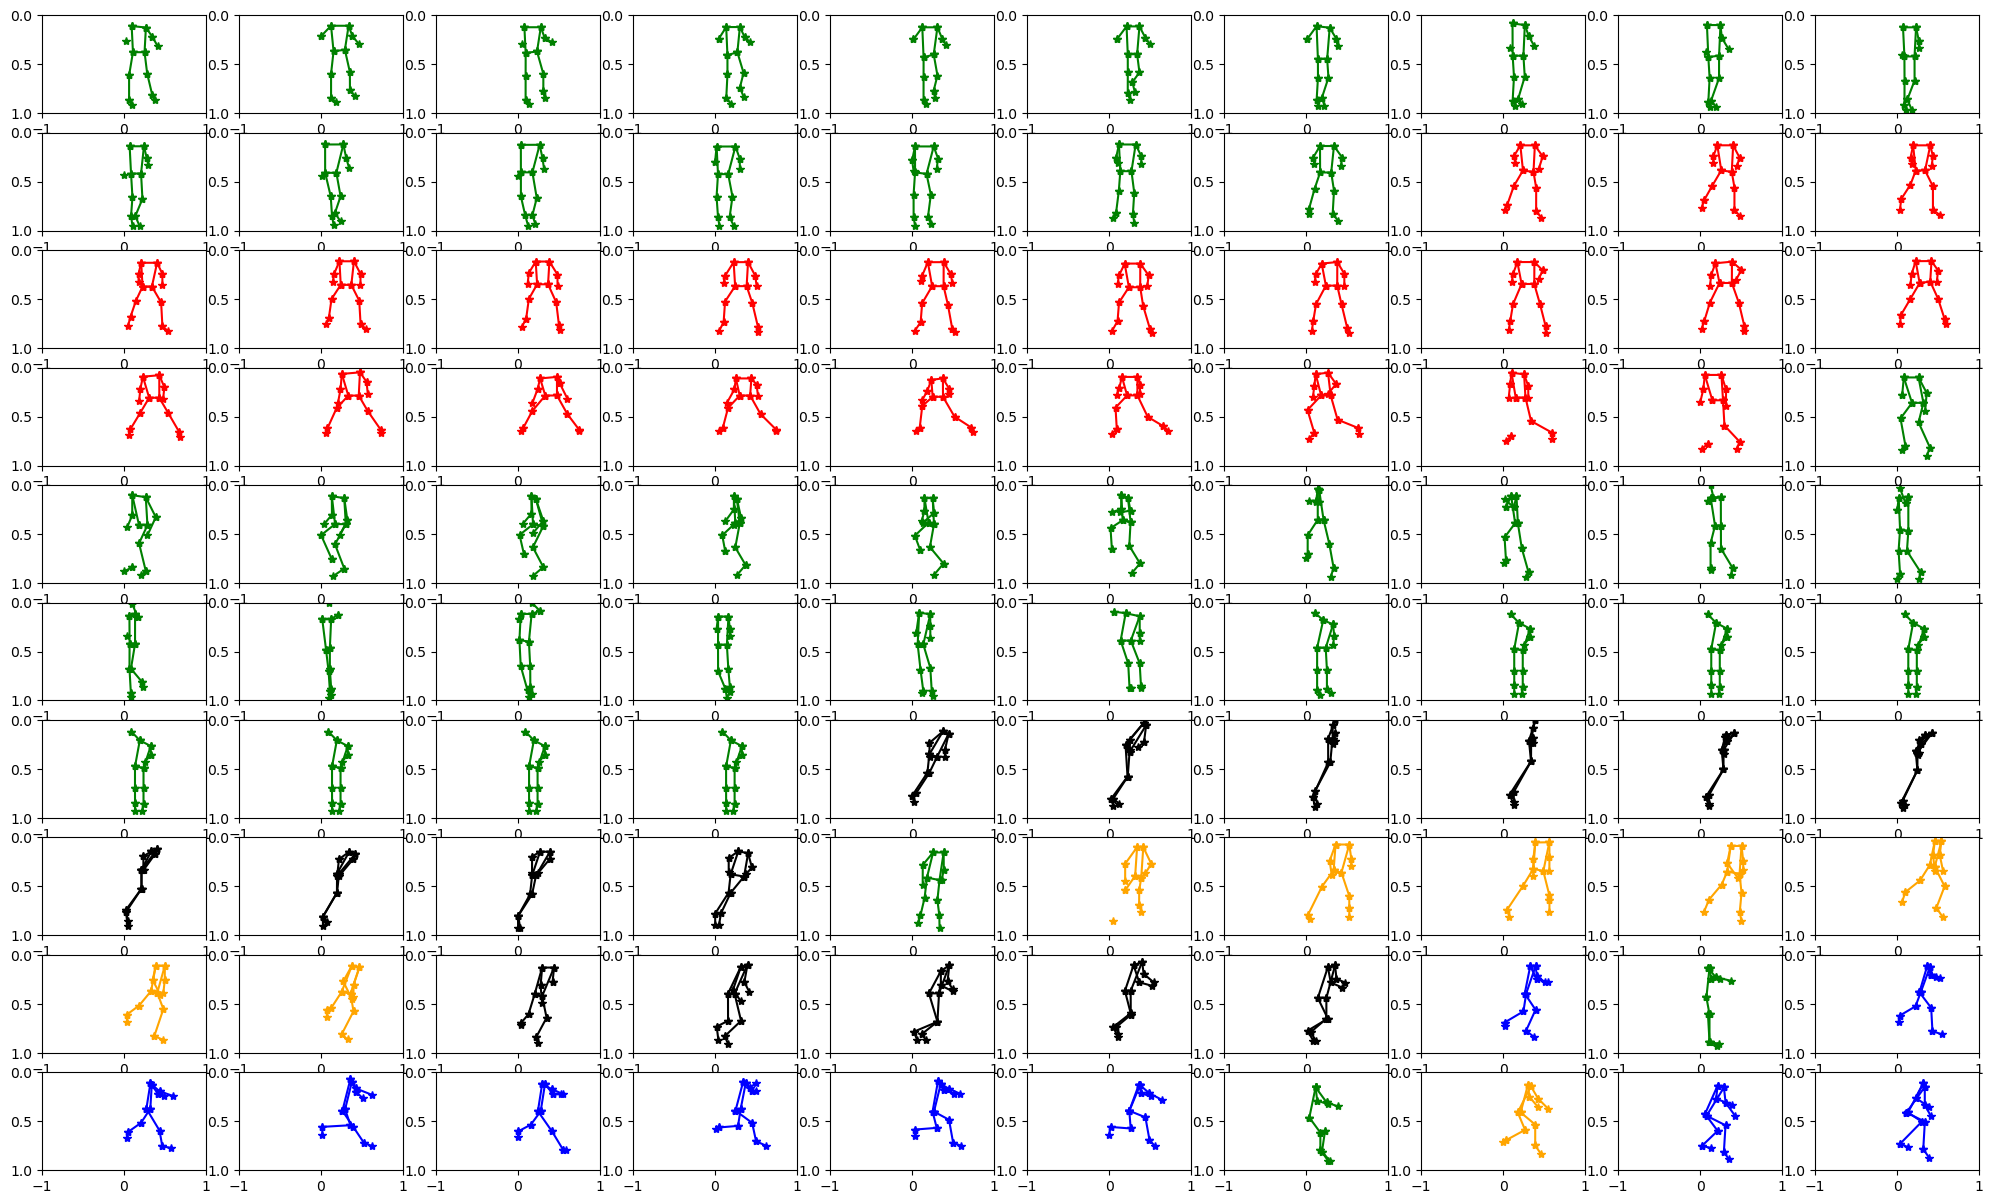

In [145]:
# Write your solution here
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# You can now use 'cluster_labels' to see which cluster each frame belongs to
# 'centroids' contains the coordinates of the cluster centers

colors = {0: 'red', 1: 'blue', 2: 'green', 3: "orange", 4: "black", 5: "brown", 6: "yellow", 7: "cyan"}  # Map cluster labels to colors
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)


---
**Task 5 (easy): Cluster characteristics💡**
1. Run the cell below to extract and plot the cluster centers.

2. Visually inspect the results and identify the characteristics of the poses in each cluster: 
    - What distinguishes the clusters?
    - What do the cluster centers represent?
    - What do the clusters reveal about movements?


3. Reason about the choice of 3 clusters and the effect on the result.

4. Change the random state and fit the model again. Explain whether you obtain different groupings and why? 



---

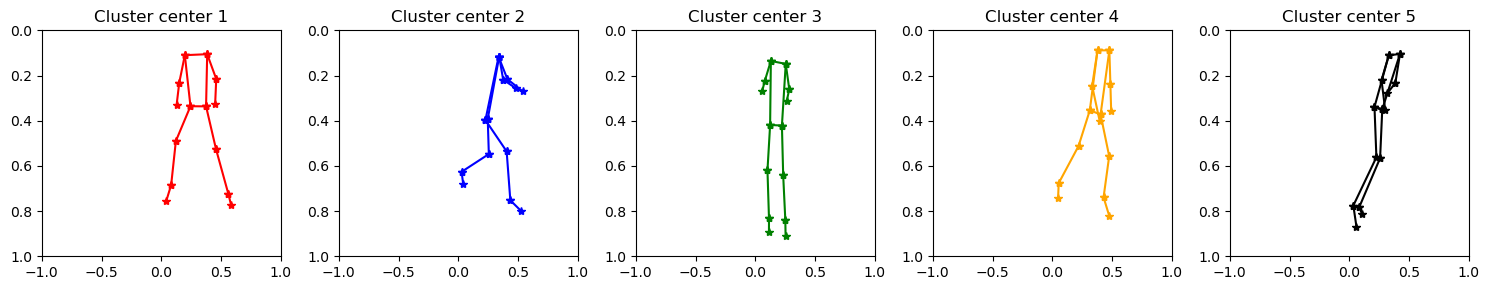

'\n2. Orientation it seems.\n\n- Cluster 1 is faced left\n- Cluster 2 is faced directly ahead\n- Cluster 3 is faced right.\n\n3. The more clusters, the more clusters will look alike. This illustrates the "diminishing returns"\nof the variance as more clusters are included. Conversely, the fewer clusters included, the more\ndifferent they will look.\n\n4. Should be slightly different on bigger datasets, and potentially very different on sparse data\nsets. The number is a seed for picking centroids, which define the clusters around them. Significantly\nchanging a centroid will significantly change the cluster, but if the data set is populous, this will\nnot be a very visible change.\n\n'

In [146]:
num_centroids = len(centroids)
# Set up subplots
fig, axes = plt.subplots(1, num_centroids, figsize=(num_centroids * 3, 3))

# Assuming you have a function plot_single_pose defined
for i in range(len(centroids)):
    plt.subplot(1, len(centroids), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(centroids[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.tight_layout()
plt.show()


# write your reflection here
"""
2. Orientation it seems.

- Cluster 1 is faced left
- Cluster 2 is faced directly ahead
- Cluster 3 is faced right.

3. The more clusters, the more clusters will look alike. This illustrates the "diminishing returns"
of the variance as more clusters are included. Conversely, the fewer clusters included, the more
different they will look.

4. Should be slightly different on bigger datasets, and potentially very different on sparse data
sets. The number is a seed for picking centroids, which define the clusters around them. Significantly
changing a centroid will significantly change the cluster, but if the data set is populous, this will
not be a very visible change.

"""
 


---
**Task 6 (medium): Elbow Method👩‍💻💡**
This task uses the Elbow Method to choose the number of clusters `k`
. The cell below:
- Applies k-means clustering to the sequence using each `k`
 in `k_range`
.
- Extracts the within-cluster sum of squares using [`kmeans.intertia_`
](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html)
 and stores it in a list.
- Plots the within-cluster sum of squares as a function of the number of clusters (elbow curve as displayed below) 

1. Visually determine the optimal number of clusters.

2. Calculate the rate of change for the elbow curve and plot its absolute value. Use the curve to determine the optimal `k`
.

3. Revisit and run the previous tasks ([Task 3](#loading), [Task 4](#loading2) and [Task 5](#loading02) ) with the optimal number of clusters. 

4. How does the elbow method influence the results in the previous tasks?



---

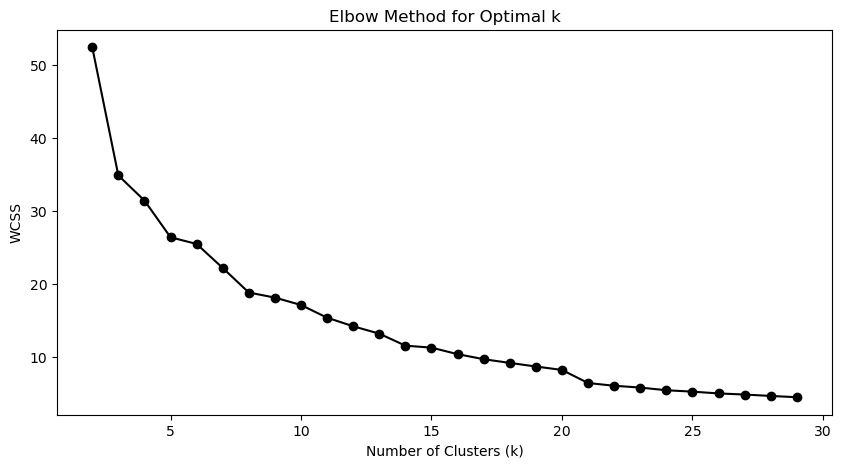

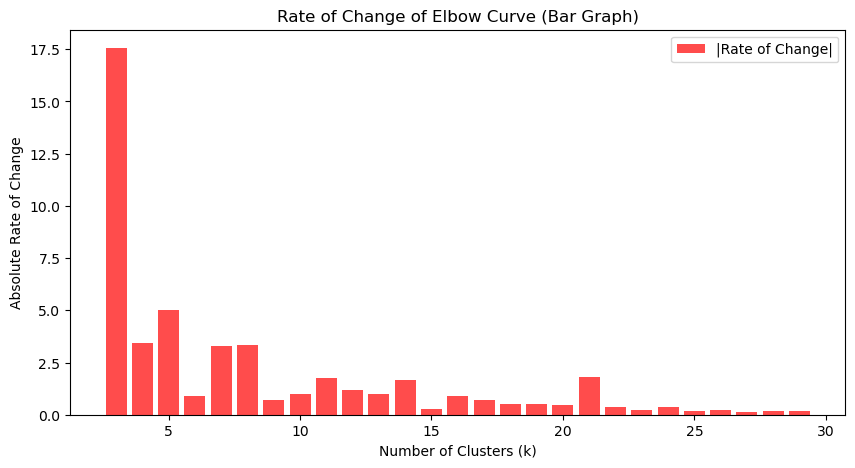

In [147]:
# Find the optimal k using the elbow method
k_range = range(2, 30) # values for the number of clusters `k`
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sequence)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

rate_of_change = np.diff(inertia)

#Plot the absolute value of the rate of change
plt.figure(figsize=(10, 5))
plt.bar(k_range[1:], np.abs(rate_of_change), color='red', alpha=0.7, label='|Rate of Change|')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Absolute Rate of Change')
plt.title('Rate of Change of Elbow Curve (Bar Graph)')
plt.legend()
plt.show()

In [148]:
# Write your reflections here...
"""
Elbow Method explanation:

The Elbow Method helps us find this optimal k value. Here’s how it works:

1.  We iterate over a range of k values, typically from 1 to n (where n is a hyper-parameter 
    you choose).
2.  For each k, we calculate the Within-Cluster Sum of Squares (WCSS).

    WCSS measures how well the data points are clustered around their respective centroids. 
    It is defined as the sum of the squared distances between each point and its cluster centroid:

    •   You sum over i from 1 to k.
	•	For each i, you sum over j from 1 to n_i.
	•	The term being summed is the distance between x_j^{(i)} (the j-th point in the i-th group) 
        and c_i (a center associated with the i-th group).

It represents the total distance of all points in all groups to their respective centers.

3.  WCSS tells us how spread out the data points are within each cluster.
    We try different k values (number of clusters). 
    For each k, we run KMeans and calculate the WCSS.
    We plot a graph with k on the X-axis and WCSS on the Y-axis.
    Identifying the Elbow Point: 
        As we increase kkk, the WCSS typically decreases because we’re creating more clusters, 
        which tend to capture more data variations. However, there comes a point where adding 
        more clusters results in only a marginal decrease in WCSS. This is where we observe 
        an “elbow” shape in the graph.

        Before the elbow: Increasing kkk significantly reduces WCSS, indicating that new clusters 
        effectively capture more of the data’s variability.

        After the elbow: Adding more clusters results in a minimal reduction in WCSS, suggesting 
        that these extra clusters may not be necessary and could lead to overfitting.

        
Answers:

1. 8
2. The bar graph indicates a number of possible elbows (k-values). 3, 5, and 8 all seem to work.
    
"""

'\nElbow Method explanation:\n\nThe Elbow Method helps us find this optimal k value. Here’s how it works:\n\n1.  We iterate over a range of k values, typically from 1 to n (where n is a hyper-parameter \n    you choose).\n2.  For each k, we calculate the Within-Cluster Sum of Squares (WCSS).\n\n    WCSS measures how well the data points are clustered around their respective centroids. \n    It is defined as the sum of the squared distances between each point and its cluster centroid:\n\n    •   You sum over i from 1 to k.\n\t•\tFor each i, you sum over j from 1 to n_i.\n\t•\tThe term being summed is the distance between x_j^{(i)} (the j-th point in the i-th group) \n        and c_i (a center associated with the i-th group).\n\nIt represents the total distance of all points in all groups to their respective centers.\n\n3.  WCSS tells us how spread out the data points are within each cluster.\n    We try different k values (number of clusters). \n    For each k, we run KMeans and calcula

## Mean-shift Clustering
This exercise is about applying mean-shift clustering to the sequence of human poses. 

---
**Task 7 (easy): Fitting the mean-shift algorithm👩‍💻**
1. Run the cell below to:    - create an instance of the `MeanShift()`
 class with a bandwith of 0.629 
    - cluster the pose sequence.




---

In [154]:
# Perform Mean Shift clustering
mean_shift = MeanShift(bandwidth=0.729)
mean_shift.fit(sequence)

MeanShift(bandwidth=0.729)


---
**Task 8 (easy): Visualizing clusters👩‍💻**
1. Extract the cluster labels for each pose in the sequence. Use the `labels_`
 attribute as described in the [documentation on mean-shift clustering.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html)

2. Visualize the pose sequence, assigning a distinct color to each pose based on its cluster.
3. Extract and plot the cluster centers using the `cluster_centers_`
 attribute.


---

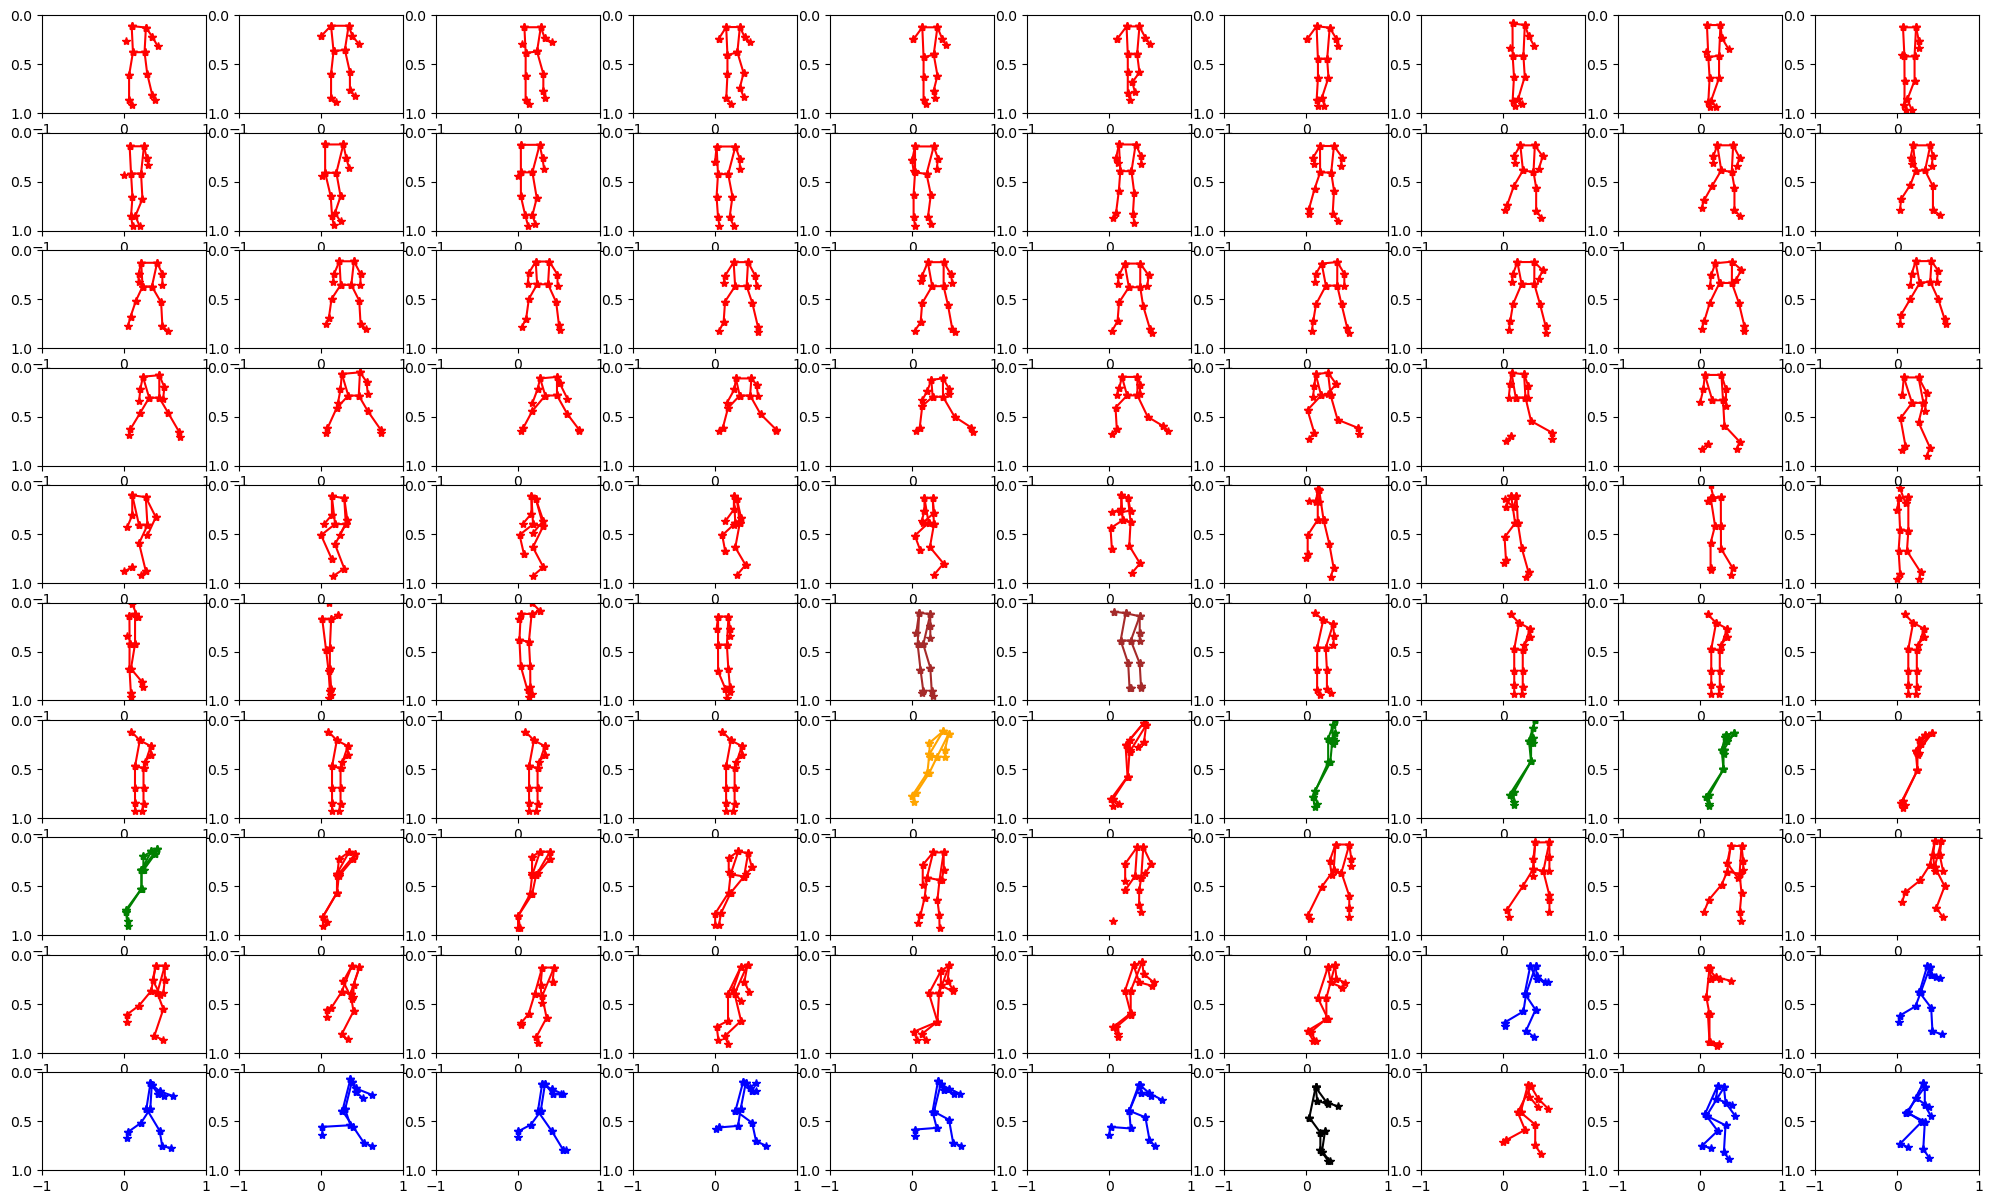

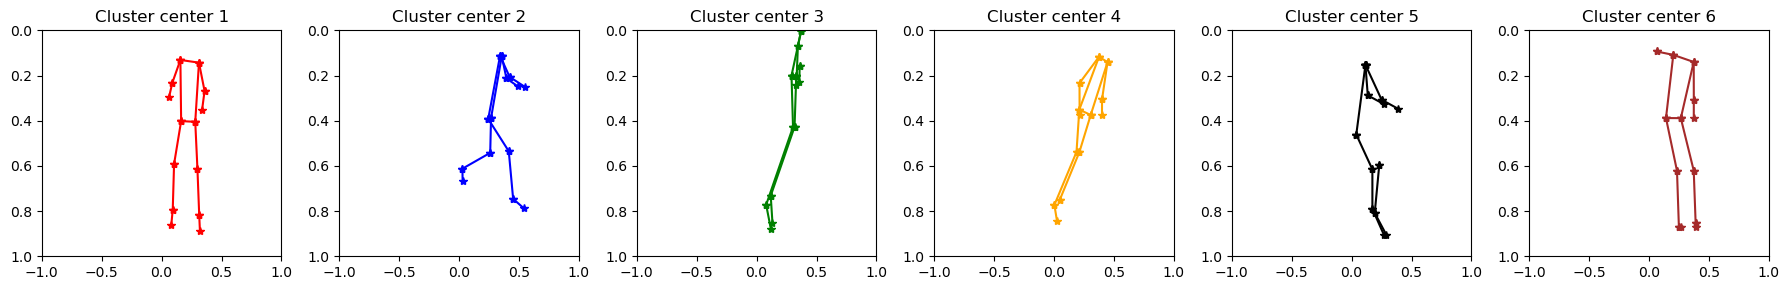

In [155]:
# Write your solution here
cluster_labels = mean_shift.labels_
centroids = mean_shift.cluster_centers_

# You can now use 'cluster_labels' to see which cluster each frame belongs to
# 'centroids' contains the coordinates of the cluster centers

colors = {0: 'red', 1: 'blue', 2: 'green', 3: "orange", 4: "black", 5: "brown", 6: "yellow", 7: "cyan"}  # Map cluster labels to colors
plt.figure(figsize=(25,15))
for i in range(len(sequence)):
    plt.subplot(10, 10, i + 1)
    plot_single_pose(sequence[i], c=colors[cluster_labels[i]], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

num_centroids = len(centroids)
# Set up subplots
fig, axes = plt.subplots(1, num_centroids, figsize=(num_centroids * 3, 3))

# Assuming you have a function plot_single_pose defined
for i in range(len(centroids)):
    plt.subplot(1, len(centroids), i+1)
    plt.title(f'Cluster center {i+1}')
    plot_single_pose(centroids[i], c=colors[i], head=False)
    plt.ylim(1, 0)
    plt.xlim(-1, 1)

plt.tight_layout()
plt.show()


---
**Task 9 (easy): Reflection and the bandwith parameter👩‍💻💡**
1. Visually examine the plots. What are the characteristics of the poses belonging to each cluster?
2. What effect does decreasing and increasing the bandwidth parameter by 0.2 (0.829 / 0.429) have and why?


**Info**
You might encounter longer run times for lower bandwith values.


---

In [ ]:
# Write your solution here
"""
1.  
2.  Decrease: maximum distance from centroid becomes smaller; the cluster becomes smaller; 
    there will be more clusters.

    Increase: maximum distance from centroid becomes bigger; the cluster becomes bigger; 
    there will be fewer clusters.
"""

## Agglomerative Clustering
This exercise is about applying hierarchical clustering to the human poses dataset.

---
**Task 10 (easy): Dendrograms👩‍💻💡**
1. Run the cell below to generate a dendrogram. 
2. How many clusters would result from setting the distance threshold to: 0.5, 1.5, 3.0, 4?
3. What types of relationships can agglomerative clustering reveal that non-hierarchical methods might miss?


---

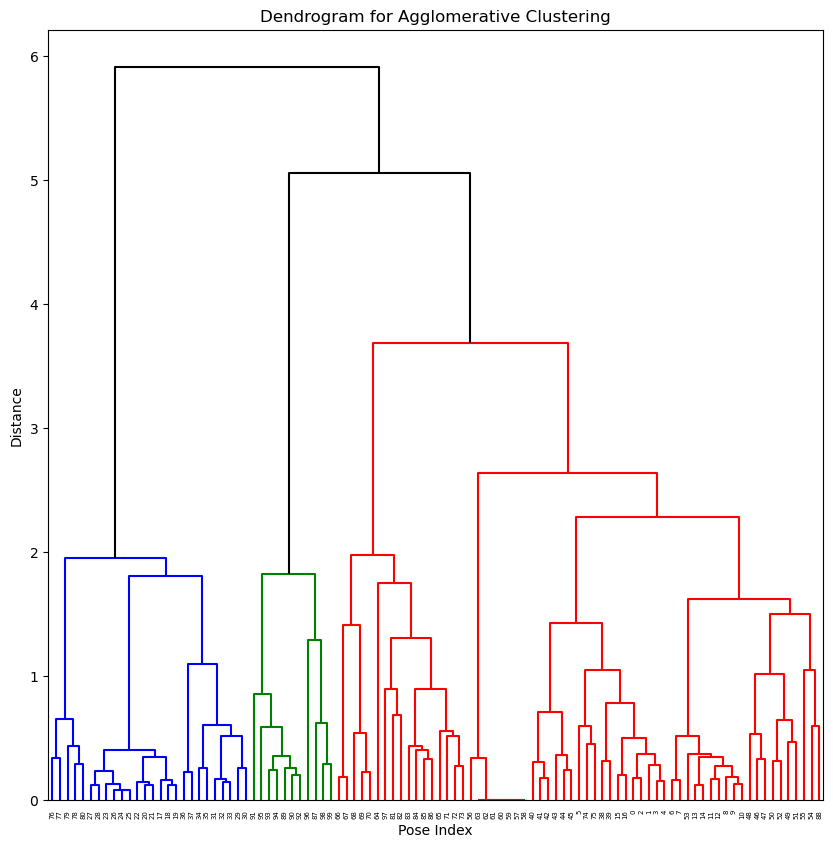

In [ ]:
colors = {0: 'black', 1: 'blue', 2: 'green', 3: 'red'}
sns.set_palette([colors[i] for i in range(len(colors))])
shc.set_link_color_palette(None)
plt.figure(figsize=(10,10))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Pose Index')
plt.ylabel('Distance')
linkage_matrix = shc.linkage(sequence, method ='ward', metric="euclidean")
Dendrogram = shc.dendrogram(linkage_matrix)


---
**Task 11 (easy): Fitting the agglomerative clustering algorithm👩‍💻**
The cell below creates an instance of the `AgglomerativeClustering()`
 class. The [documentation on agglomerative clustering is given here.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

1. Select the distance threshold that results in 3 clusters, then apply agglomerative clustering on the sequence. 
2. Extract the cluster labels for each pose in the sequence.
3. Visualize the pose sequence by assigning a distinct color to each pose based on its cluster.


---

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')

# Write your solution here (agglomerative clustering and cluster centers)


---
**Task 12 (easy): Agglomerative clustreing algorithm mean pose👩‍💻**
1. The `AgglomerativeClustering()`
 class does not have an attribute or a method for directly extracting cluster centers. Calculate the mean pose within each cluster for $k = 3$  and plot it.
2. Change the distance metric (try `l1`
 and `cosine`
) and repeat the previous two tasks ([Task 10](#loading10), [Task 11](#loading11) and [Task 12](#loading12).1). 
3. What differences do you observe, and can you explain why these differences occur? Does a different distance metric result in more meaningful clusters?


---

In [ ]:
# Write your solution here

## Comparison

---
**Task 13 (medium): Compare and reflect on the methods👩‍💻💡**
1. Compare the clustered poses obtained with the different clustering methods (K-means, Mean-shift and Agglomerative clustering). What are the similarities and differences between the pose clusters across methods?
2. Why can clusters look similar across methods? 
3. What are the main reasons behind differences in the clusters?
4. The algorithms use different methods for determining the number of clusters. How do these differences impact the results for the pose data?


---

In [ ]:
# write your relfection here